#import python packages

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import io
import nltk
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPool1D

#Read dataset as json file

In [2]:
with open("/content/Intent.json") as diabetes_dataset:
  dataset = json.load(diabetes_dataset)

In [3]:
def processing_json_dataset(dataset):
  tags = []
  inputs = []
  responses={}
  for intent in dataset['intents']:
    responses[intent['intent']]=intent['responses']
    for lines in intent['text']:
      inputs.append(lines)
      tags.append(intent['intent'])
  return [tags, inputs, responses]

In [4]:
[tags, inputs, responses] = processing_json_dataset(dataset)

#dataset as DataFrame

In [5]:
dataset = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [6]:
dataset.head()

,inputs,tags
0,Hi,Greeting
1,Hi there,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello there,Greeting


In [7]:
dataset = dataset.sample(frac=1)

In [8]:
dataset.head()

,inputs,tags
29,Great thanks! It is Bella,CourtesyGreetingResponse
103,You are very clever,Clever
100,Do you see anyone in the camera?,WhoAmI
63,I am not talking to you,NotTalking2U
129,Why,PodBayDoorResponse


#Pre-processing text of dataset

In [9]:
import string
dataset['inputs'] = dataset['inputs'].apply(lambda sequence:
                                            [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])

In [10]:
dataset.head()

,inputs,tags
29,"[g, r, e, a, t, , t, h, a, n, k, s, , i, t, ...",CourtesyGreetingResponse
103,"[y, o, u, , a, r, e, , v, e, r, y, , c, l, ...",Clever
100,"[d, o, , y, o, u, , s, e, e, , a, n, y, o, ...",WhoAmI
63,"[i, , a, m, , n, o, t, , t, a, l, k, i, n, ...",NotTalking2U
129,"[w, h, y]",PodBayDoorResponse


In [11]:
dataset['inputs'] = dataset['inputs'].apply(lambda wrd: ''.join(wrd))

In [12]:
dataset.head()

,inputs,tags
29,great thanks it is bella,CourtesyGreetingResponse
103,you are very clever,Clever
100,do you see anyone in the camera,WhoAmI
63,i am not talking to you,NotTalking2U
129,why,PodBayDoorResponse


In [13]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(dataset['inputs'])
train = tokenizer.texts_to_sequences(dataset['inputs'])
features = pad_sequences(train)
le = LabelEncoder()
labels = le.fit_transform(dataset['tags'])

In [14]:
len(features[0])

9

In [15]:
input_shape = features.shape[1]
print(input_shape)

9


In [16]:
features.shape

(143, 9)

In [17]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  117
output length:  22


In [18]:
tokenizer.word_index

{'you': 1,
 'is': 2,
 'me': 3,
 'are': 4,
 'i': 5,
 'what': 6,
 'the': 7,
 'thanks': 8,
 'do': 9,
 'can': 10,
 'name': 11,
 'am': 12,
 'please': 13,
 'your': 14,
 'a': 15,
 'pod': 16,
 'bay': 17,
 'door': 18,
 'tell': 19,
 'bella': 20,
 'open': 21,
 'adam': 22,
 'not': 23,
 'to': 24,
 'prove': 25,
 'real': 26,
 'time': 27,
 'it': 28,
 'talking': 29,
 'why': 30,
 'gossip': 31,
 'how': 32,
 'my': 33,
 'see': 34,
 'good': 35,
 'call': 36,
 'know': 37,
 'great': 38,
 'very': 39,
 'wasnt': 40,
 'bye': 41,
 'user': 42,
 'goodbye': 43,
 'this': 44,
 'thank': 45,
 'hello': 46,
 'who': 47,
 'clever': 48,
 'have': 49,
 'conscious': 50,
 'any': 51,
 'for': 52,
 'quiet': 53,
 'hi': 54,
 'girl': 55,
 'ok': 56,
 'joke': 57,
 'there': 58,
 'will': 59,
 'doing': 60,
 'well': 61,
 'some': 62,
 'anyone': 63,
 'in': 64,
 'camera': 65,
 'up': 66,
 'think': 67,
 'be': 68,
 'intelligent': 69,
 'genious': 70,
 'self': 71,
 'aware': 72,
 'selfaware': 73,
 'understand': 74,
 'saying': 75,
 'hola': 76,
 'hope':

# data visualizations

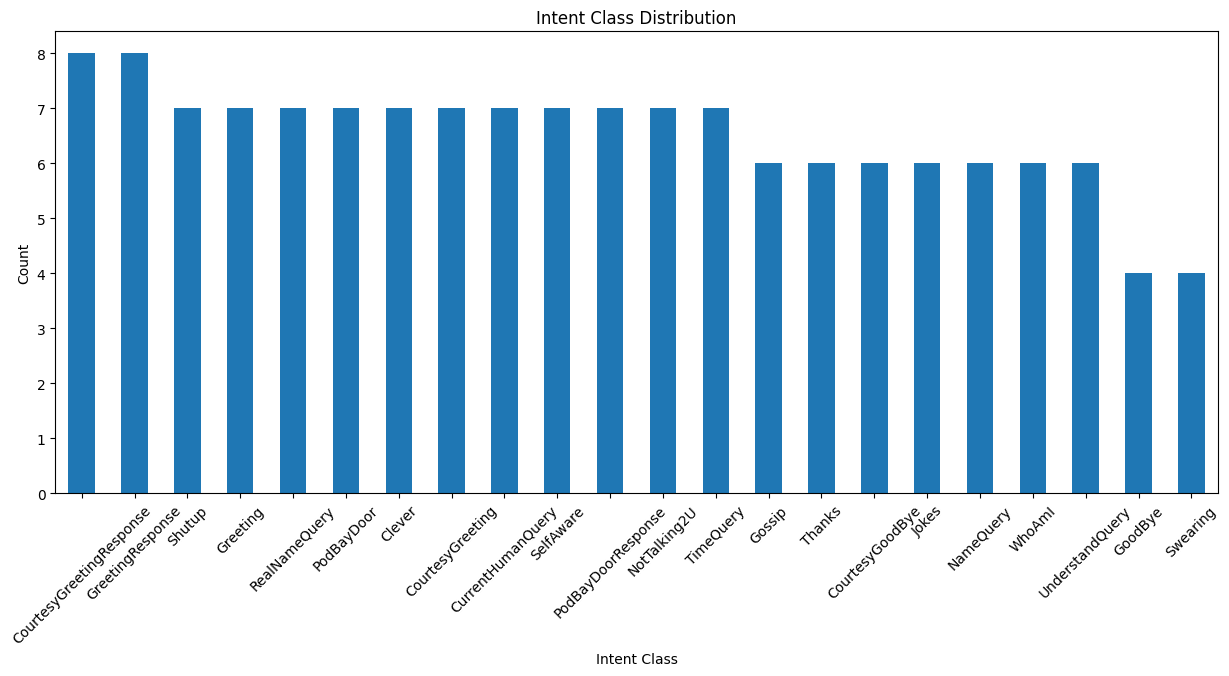

In [19]:
import matplotlib.pyplot as plt

# Count the occurrences of each intent
intent_counts = dataset['tags'].value_counts()

# Create a bar chart
plt.figure(figsize=(15, 6))
intent_counts.plot(kind='bar')
plt.title('Intent Class Distribution')
plt.xlabel('Intent Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


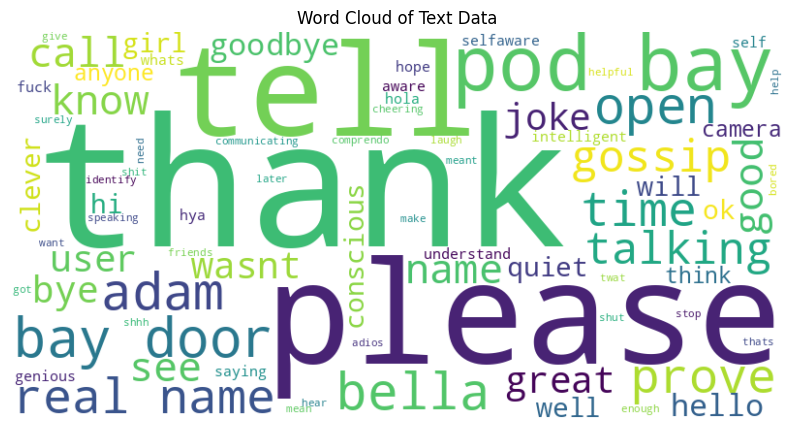

In [20]:
from wordcloud import WordCloud

# Combine all the text data into a single string
text = " ".join(dataset['inputs'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


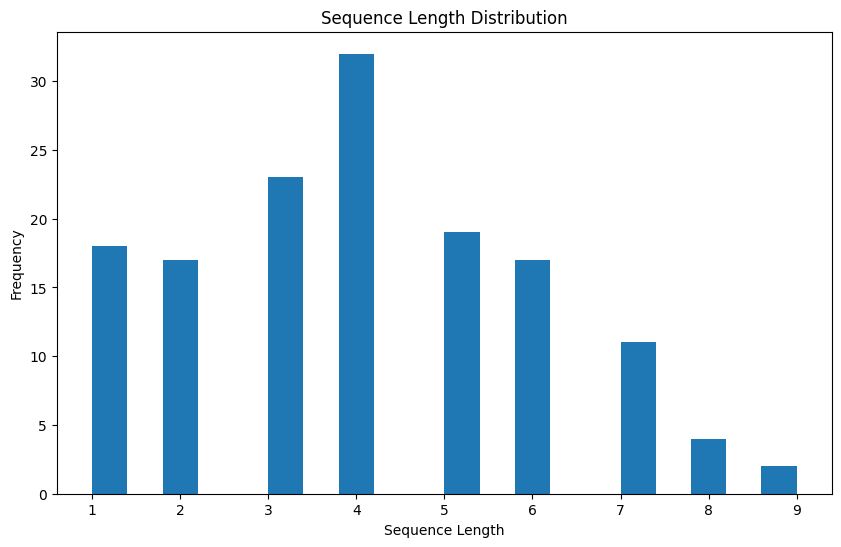

In [21]:
# Calculate the lengths of sequences
sequence_lengths = [len(seq) for seq in train]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=20)
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


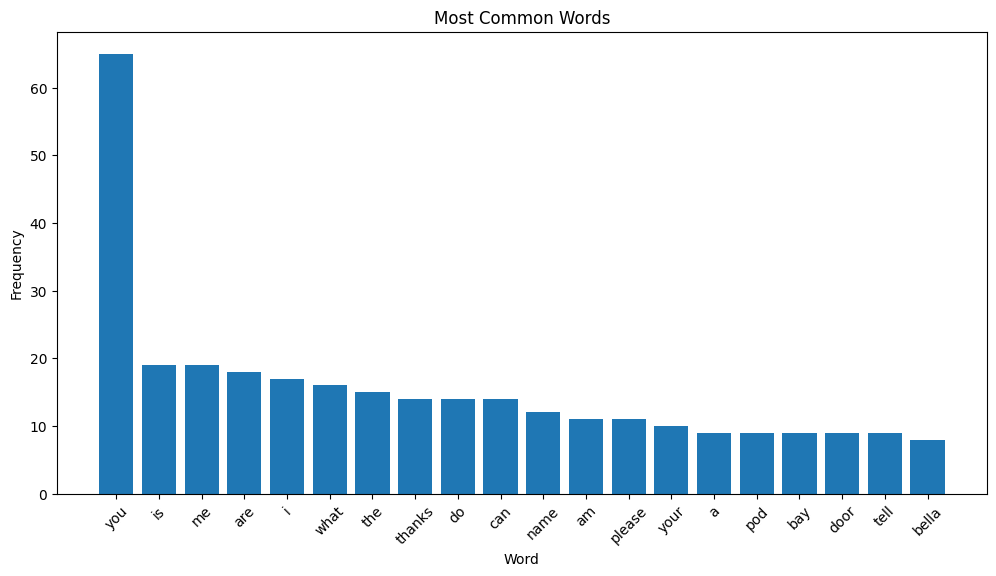

In [22]:
from collections import Counter

# Tokenize the text and count word frequencies
word_tokens = [word for sentence in dataset['inputs'] for word in sentence.split()]
word_counts = Counter(word_tokens)

# Get the most common words and their counts
common_words = word_counts.most_common(20)

# Create a bar chart for common words
plt.figure(figsize=(12, 6))
plt.bar(*zip(*common_words))
plt.title('Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


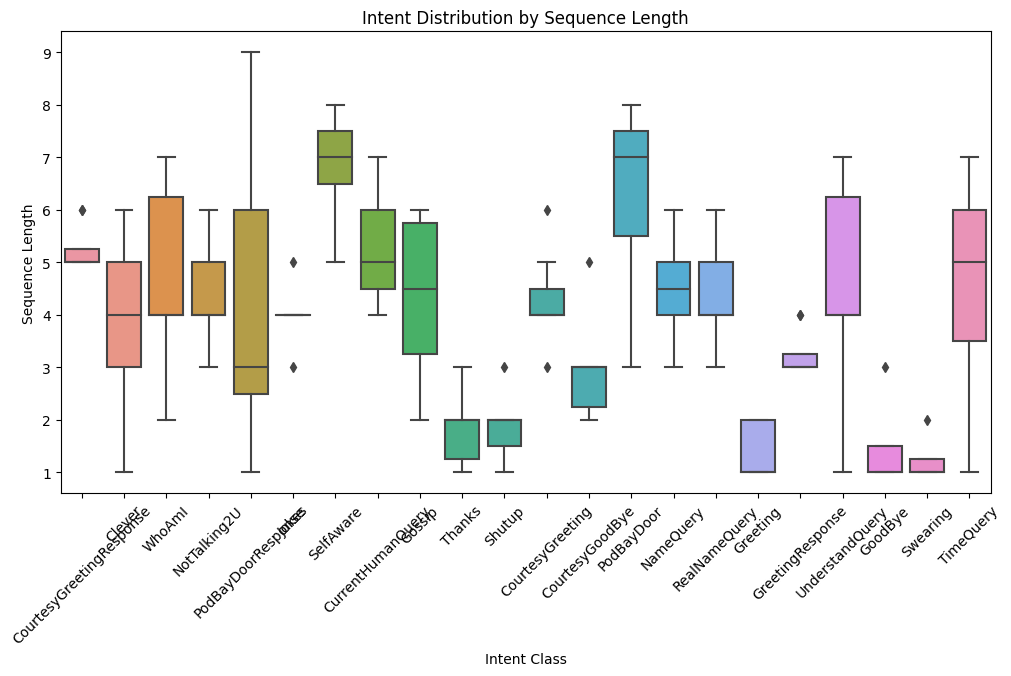

In [23]:
import seaborn as sns
# Add sequence lengths to the dataset
dataset['sequence_length'] = [len(seq) for seq in train]

# Create a box plot to show intent distribution by sequence length
plt.figure(figsize=(12, 6))
sns.boxplot(x='tags', y='sequence_length', data=dataset)
plt.title('Intent Distribution by Sequence Length')
plt.xlabel('Intent Class')
plt.ylabel('Sequence Length')
plt.xticks(rotation=45)
plt.show()


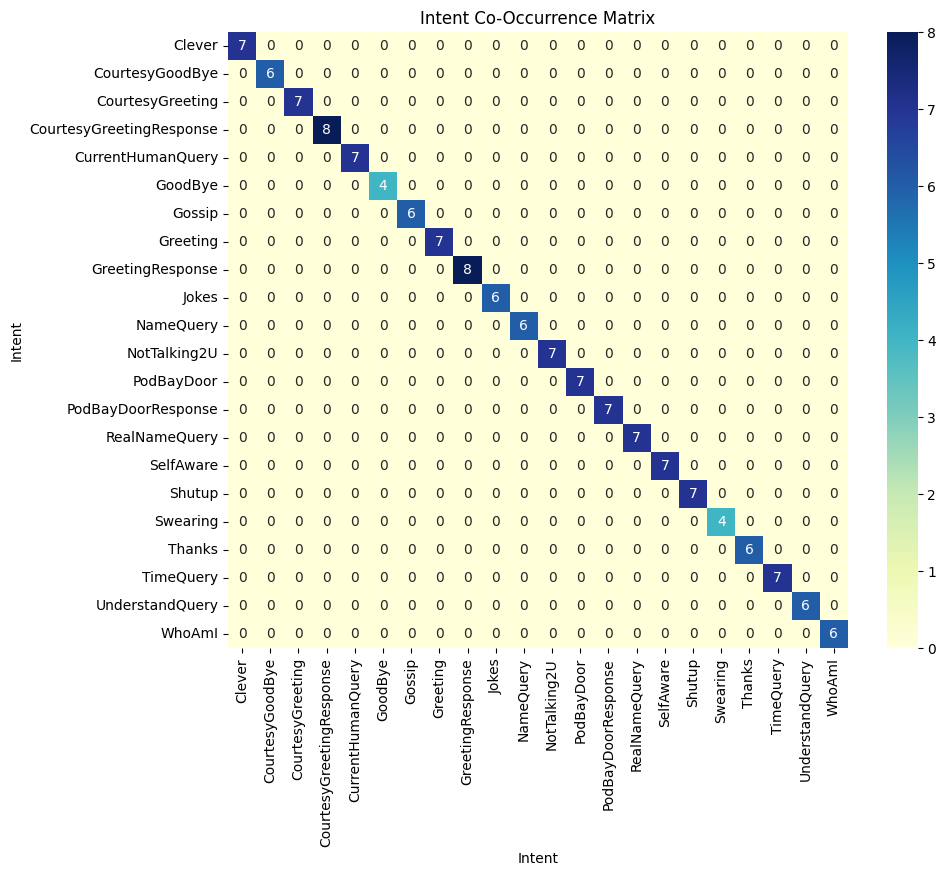

In [24]:
# Create a co-occurrence matrix
co_occurrence_matrix = dataset.groupby(['tags', 'tags']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='YlGnBu')
plt.title('Intent Co-Occurrence Matrix')
plt.xlabel('Intent')
plt.ylabel('Intent')
plt.show()


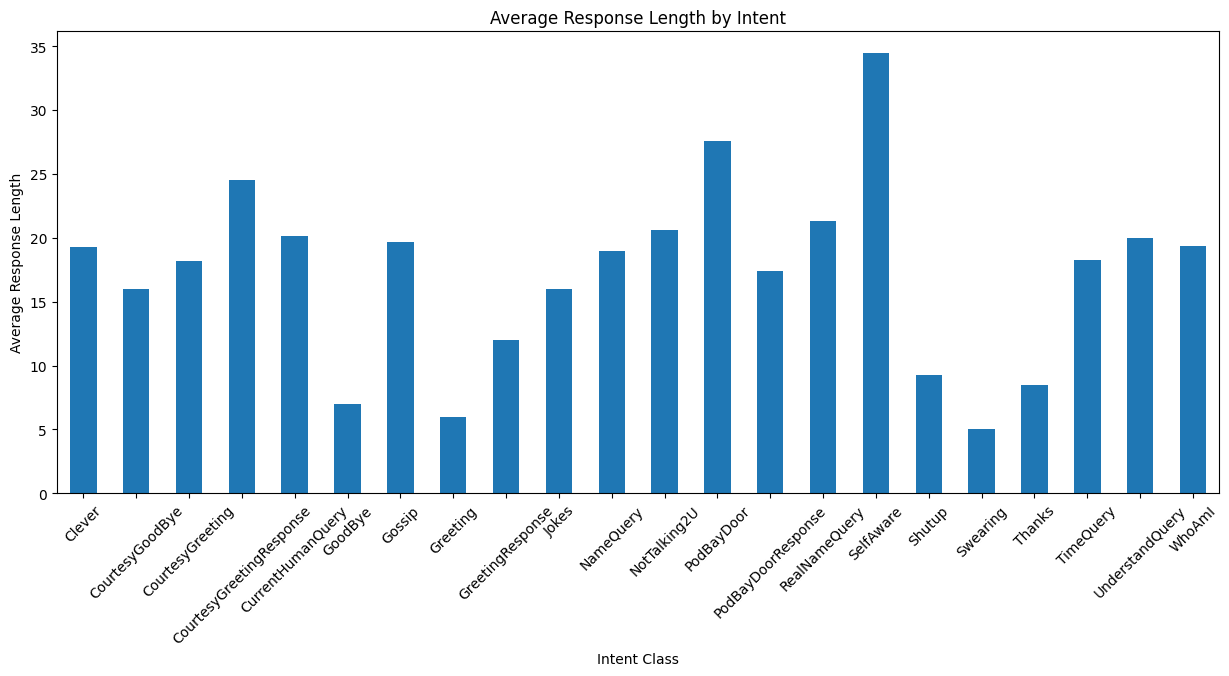

In [25]:
# Calculate the lengths of responses for each intent
intent_response_lengths = dataset.groupby('tags')['inputs'].apply(lambda x: x.str.len().mean())

# Create a bar chart to show the average response length for each intent
plt.figure(figsize=(15, 6))
intent_response_lengths.plot(kind='bar')
plt.title('Average Response Length by Intent')
plt.xlabel('Intent Class')
plt.ylabel('Average Response Length')
plt.xticks(rotation=45)
plt.show()


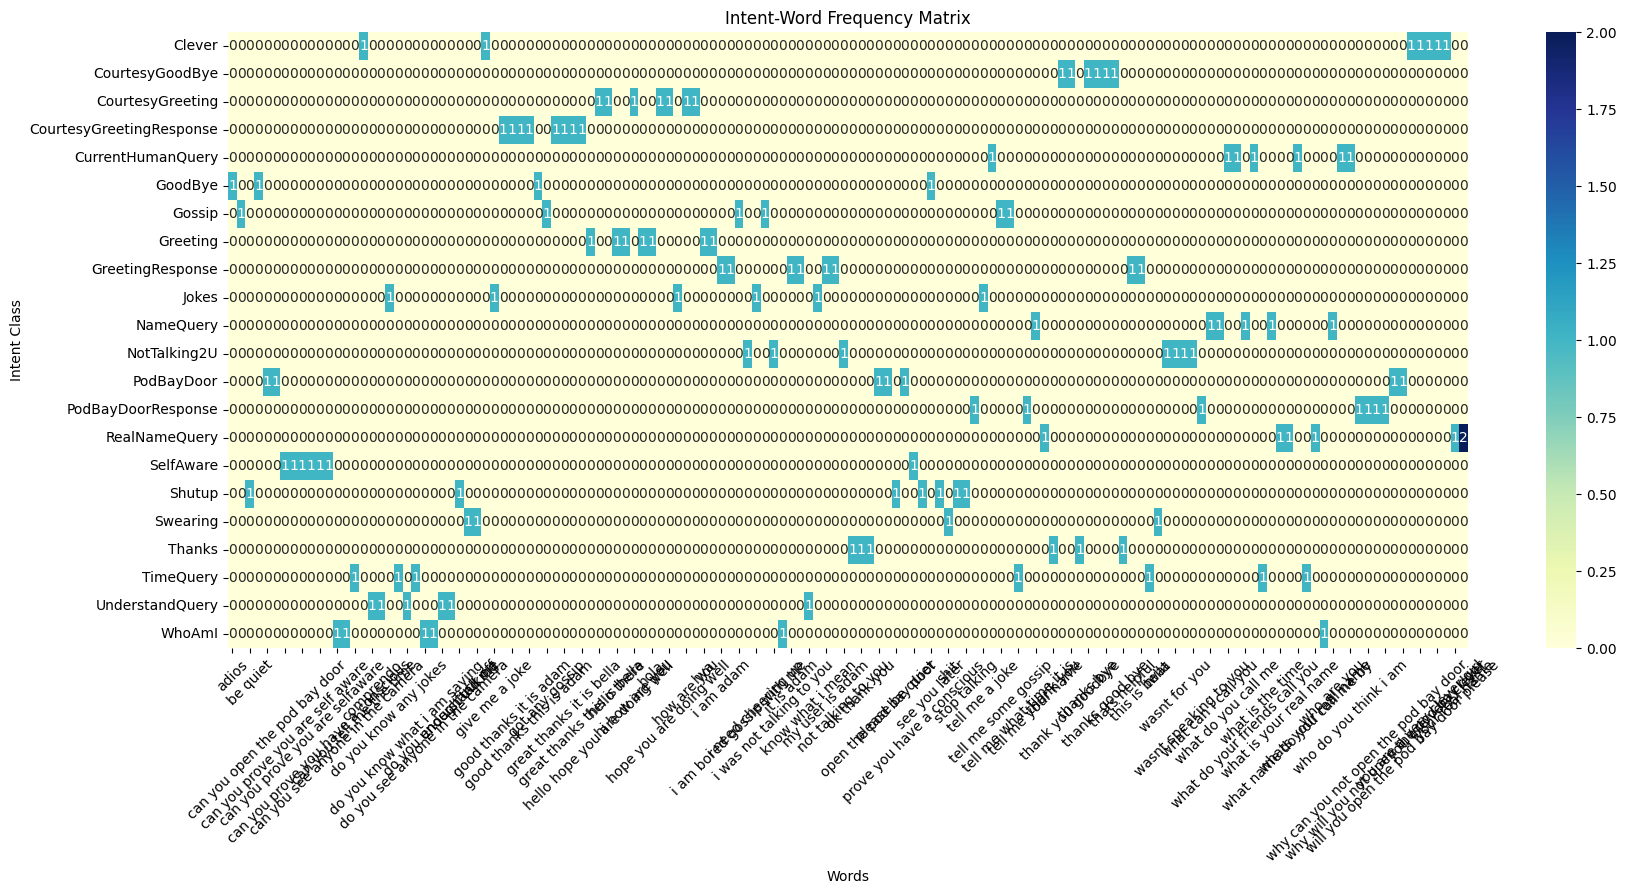

In [26]:
# Create a matrix where rows represent intents and columns represent words
intent_word_matrix = dataset.groupby(['tags', 'inputs']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(intent_word_matrix, annot=True, cmap='YlGnBu')
plt.title('Intent-Word Frequency Matrix')
plt.xlabel('Words')
plt.ylabel('Intent Class')
plt.xticks(rotation=45)
plt.show()


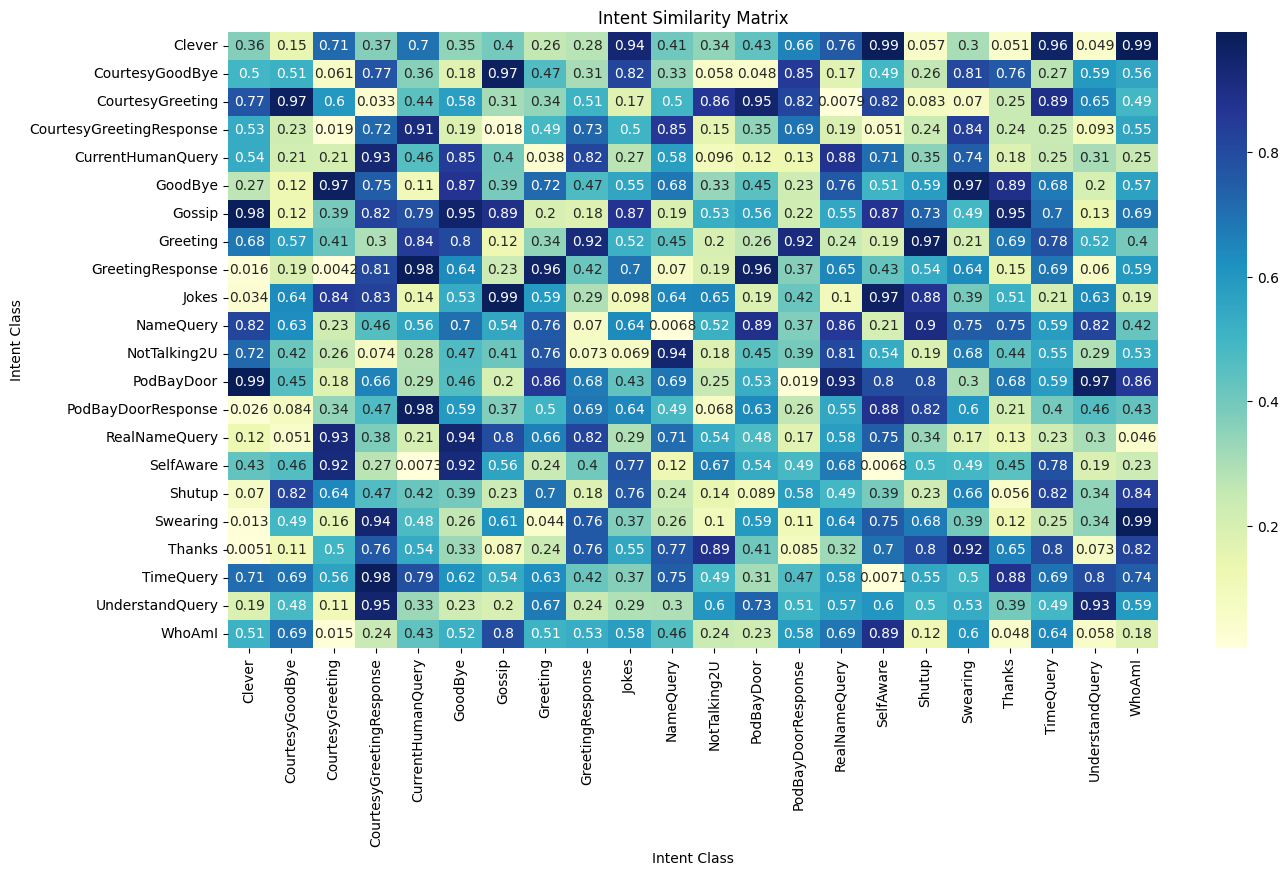

In [27]:
# Create a similarity matrix (example: cosine similarity)
similarity_matrix = np.random.rand(output_length, output_length)  # Replace with your similarity matrix

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='YlGnBu', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Intent Similarity Matrix')
plt.xlabel('Intent Class')
plt.ylabel('Intent Class')
plt.show()


#RNN MODEL

## Build RNN Model

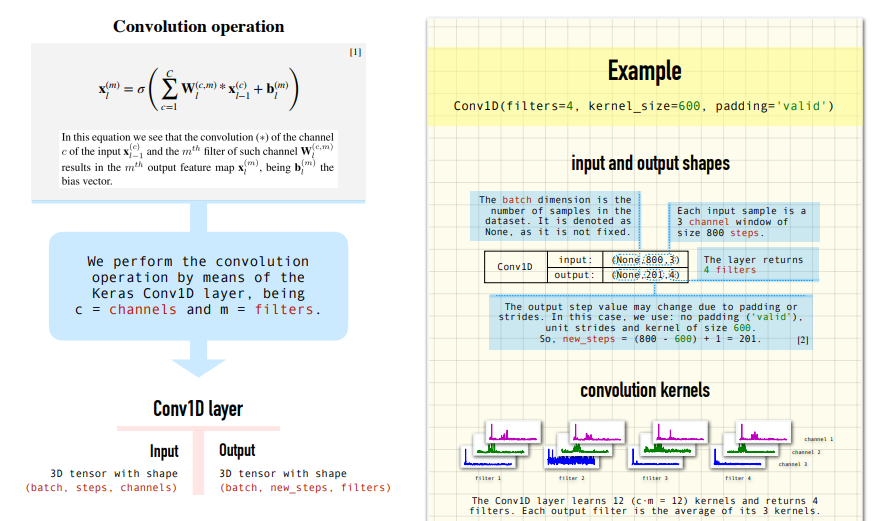

In [28]:
m = Sequential()
m.add(Input(shape=(features.shape[1])))
m.add(Embedding(vocabulary + 1,100))
m.add(Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001)))
m.add(Dropout(0.3))
m.add(LSTM(32, dropout=0.3,return_sequences=True))
m.add(LSTM(16, dropout=0.3,return_sequences=False))
m.add(Dense(128,activation="relu", activity_regularizer = tf.keras.regularizers.L2(0.0001)))
m.add(Dropout(0.6))
m.add(Dense(output_length, activation="softmax", activity_regularizer = tf.keras.regularizers.L2(0.0001)))

In [29]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2023-09-13 19:09:12--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-09-13 19:09:13--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.09MB/s    in 2m 42s  

2023-09-13 19:11:55 (5.09 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [30]:
m.layers

In [31]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [32]:
glove_dir = "/content/glove.6B.100d.txt"
embeddings_index = {}
file_ = open(glove_dir)
for line in file_:
    arr = line.split()
    single_word = arr[0]
    w = np.asarray(arr[1:],dtype='float32')
    embeddings_index[single_word] = w
file_.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [33]:
max_words = vocabulary + 1
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words,100)).astype(object)
for word , i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [34]:
m.layers[0].set_weights([embedding_matrix])
m.layers[0].trainable = False

In [35]:
m.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [36]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 9, 100)            11800     
                                                                 
 conv1d (Conv1D)             (None, 5, 32)             16032     
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm (LSTM)                 (None, 5, 32)             8320      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [37]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 400, mode = 'min', restore_best_weights = True)

In [38]:
history_training = m.fit(features,labels,epochs=2000, batch_size=64, callbacks=[ earlyStopping])

Epoch 1/2000
3/3 [==============================] - 17s 51ms/step - loss: 3.0970 - accuracy: 0.0699
Epoch 2/2000
3/3 [==============================] - 0s 12ms/step - loss: 3.0925 - accuracy: 0.0699
Epoch 3/2000
3/3 [==============================] - 0s 12ms/step - loss: 3.0897 - accuracy: 0.0559
Epoch 4/2000
3/3 [==============================] - 0s 11ms/step - loss: 3.0876 - accuracy: 0.0699
Epoch 5/2000
3/3 [==============================] - 0s 11ms/step - loss: 3.0776 - accuracy: 0.0979
Epoch 6/2000
3/3 [==============================] - 0s 10ms/step - loss: 3.0787 - accuracy: 0.0979
Epoch 7/2000
3/3 [==============================] - 0s 12ms/step - loss: 3.0704 - accuracy: 0.0909
Epoch 8/2000
3/3 [==============================] - 0s 12ms/step - loss: 3.0696 - accuracy: 0.1259
Epoch 9/2000
3/3 [==============================] - 0s 12ms/step - loss: 3.0687 - accuracy: 0.0699
Epoch 10/2000
3/3 [==============================] - 0s 13ms/step - loss: 3.0596 - accuracy: 0.1259
Epoch 11

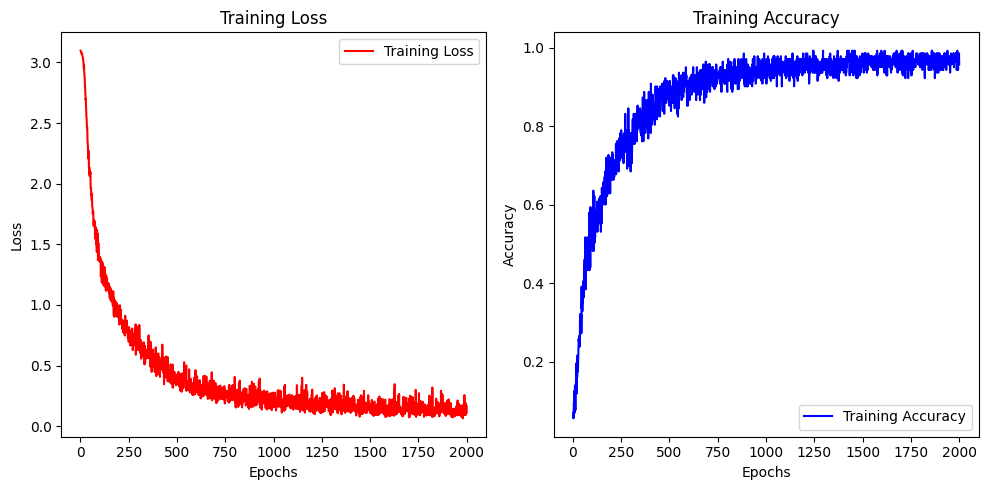

In [39]:
import matplotlib.pyplot as plt

# Extract training history
loss = history_training.history['loss']
accuracy = history_training.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [40]:
import matplotlib as mpl
def draw_plot(data, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (25, 5))
  plt.plot(data,'darkorange', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

<ipython-input-40-9446446f8df0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


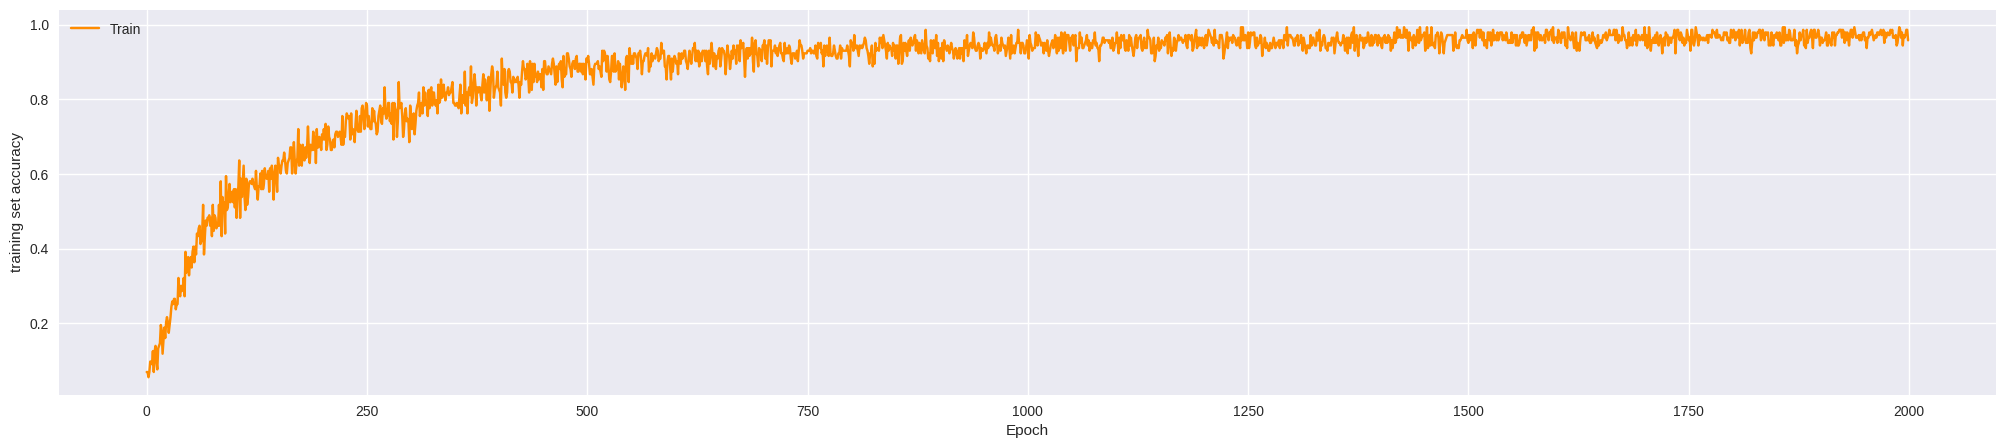

In [41]:
draw_plot(history_training.history['accuracy'],'training set accuracy' )

<ipython-input-40-9446446f8df0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


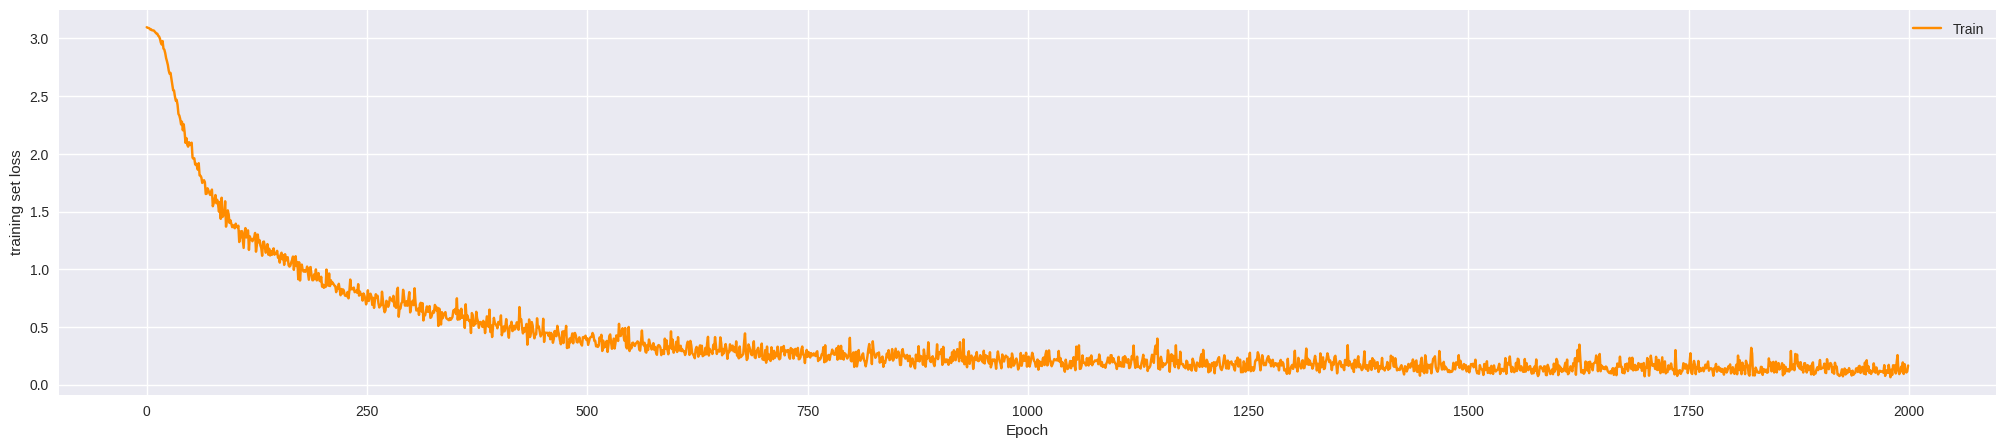

In [42]:
draw_plot(history_training.history['loss'],'training set loss' )

In [43]:
m.evaluate(features, labels, batch_size = 64)

3/3 [==============================] - 1s 7ms/step - loss: 0.0447 - accuracy: 0.9930


[0.044676367193460464, 0.9930070042610168]

#Live Testing

In [44]:
import random
def generate_answer(query):
  texts = []
  pred_input = query
  pred_input = [letters.lower() for letters in pred_input if letters not in string.punctuation]
  pred_input = ''.join(pred_input)
  texts.append(pred_input)
  pred_input = tokenizer.texts_to_sequences(texts)
  pred_input = np.array(pred_input).reshape(-1)
  pred_input = pad_sequences([pred_input],input_shape)
  output = m.predict(pred_input)
  output = output.argmax()
  response_tag = le.inverse_transform([output])[0]
  return random.choice(responses[response_tag])

In [45]:
list_que = ["hello", "my name is marina ","what is my name?",
            "what is your name?", "tell me please, what is your name?"]
for i in list_que:
  print("you: {}".format(i))
  res_tag = generate_answer(i)
  print(res_tag)

you: hello
1/1 [==============================] - 1s 735ms/step
Hello human, please tell me your GeniSys user
you: my name is marina 
1/1 [==============================] - 0s 20ms/step
Great! Hi <HUMAN>! How can I help?
you: what is my name?
1/1 [==============================] - 0s 21ms/step
Your name is  <HUMAN>, how can I help you?
you: what is your name?
1/1 [==============================] - 0s 20ms/step
Call me Geni
you: tell me please, what is your name?
1/1 [==============================] - 0s 30ms/step
My real name is GeniSys
